#**Predicting Hotel Booking Cancellation**

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?


This project aims to explore hotel booking data and find the appropriate prediction model for predicting hotel booking cancellation. This Hotel Booking Cancellation Prediction model can be useful for the hotels’ owners to prevent cancellation.


Dataset source: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand



**About The Dataset**

This data set consists of 119,390 observations and holds booking data for a city hotel and a resort hotel in Portugal from 2015 to 2017. It has 32 variables which include reservation and arrival date, length of stay, canceled or not, the number of adults, children, or babies, the number of available parking spaces, how many special guests, companies, and agents pushed the reservation, etc.

# 1. Import Libraries

In [1]:
# standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# libraries for modelling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier


# 2. Load Data


In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load data
df = pd.read_csv('/content/drive/MyDrive/Belajar/DataScience/FinalProject/hotel_bookings.csv')

## 2.1 Preliminary Look


In [4]:
pd.set_option('max_columns', None)

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df['is_canceled'].value_counts(normalize='True')

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

## 2.2 Data Dictionary

1. is_canceled : Value indicating if the booking was canceled (1) or not (0) - 
Target feature
2. hotel : Hotel (H1 = Resort Hotel or H2 = City Hotel)
3. lead_time : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
4. arrival_date_year : Year of arrival date
5. arrival_date_month : Month of arrival date
6. arrival_date_week_number : Week number of year for arrival date
7. arrival_date_day_of_month : Day of arrival date
8. stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
9. stays_in_week_nights : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
10. adults : Number of adults
11. children : Number of children
12. babies : Number of babies
13. meal : Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
14. country : Country of origin. Categories are represented in the ISO 3155–3:2013 format
15. market_segment : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
16. distribution_channel : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
17. is_repeated_guest : Value indicating if the booking name was from a repeated guest (1) or not (0)
18. previous_cancellations : Number of previous bookings that were cancelled by the customer prior to the current booking
19. previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking
20. reserved_room_type : Code of room type reserved. Code is presented instead of designation for anonymity reasons.
21. assigned_room_type : Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
22. booking_changes : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
23. deposit_type : Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
24. agent : ID of the travel agency that made the booking
25. company : ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
26. days_in_waiting_list : Number of days the booking was in the waiting list before it was confirmed to the customer
27. customer_type : Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
28. adr : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
29. required_car_parking_spaces : Number of car parking spaces required by the customer
30. total_of_special_requests : Number of special requests made by the customer (e.g. twin bed or high floor)
31. reservation_status : Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why
32. reservation_status_date : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel


## 2.3 Observations

* The dataset contains 32 columns and 119390 entries. The target column is `is_canceled`
* There are missing data in the dataframe. Majority of missing data comes from `company`, and then `agent`, `country`.
* No obvious defect on the data (column name vs its entries), all looks good
* In target variable `is_canceled`, the number of canceled booking (is_canceled = 1) is lower than not canceled booking. But, the imbalance condition is NOT severe (still OK)

# 3. Exploratory Data Analysis

### Statistical Summary

In [8]:
# Group numeric columns
numericals = df.loc[:, (df.dtypes == int) | (df.dtypes == float)].columns.tolist()
numericals


['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [9]:
# Group categoric columns
categoricals = df.loc[:, (df.dtypes != int) & (df.dtypes != float)].columns.tolist()
categoricals


['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


**Interpretation:** 

* The `adr` column (average daily rate) **have** minimum of -6.38 and a maximum of 5400. A negative ADR could be possible if a hotel had to compensate a guest for some reason. While those numbers are surprising, we do not have enough information to assure that those observations are not accurate datapoints.   
* Min value in `adults` column is 0 is weird because a reservation should be made by at least one adults. Will be processed later in data preprocessing section.

In [11]:
df[categoricals].describe().transpose()

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


In [12]:
# showing the precise value counts
for col in categoricals:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of hotel column
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64 

Value counts of arrival_date_month column
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64 

Value counts of meal column
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64 

Value counts of country column
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64 

Value counts of market_segment column
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2

In [13]:
# is_canceled value count
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [14]:
# Percentage of is_canceled
df['is_canceled'].value_counts(normalize=True)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

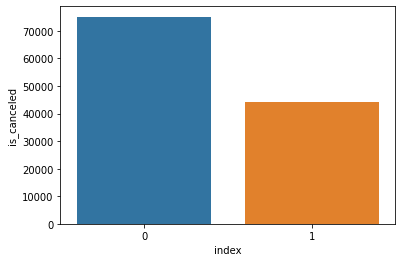

In [15]:
count_canceled = df['is_canceled'].value_counts().reset_index()

sns.barplot(x=count_canceled['index'],y=count_canceled['is_canceled'])
plt.show()

**Interpretation:** 

In terms of the target variable, the number of canceled booking (is_canceled = 1) is lower than not canceled booking. But, the imbalance condition is NOT severe (still OK)

### Univariate Analysis

#### Detect Outliers

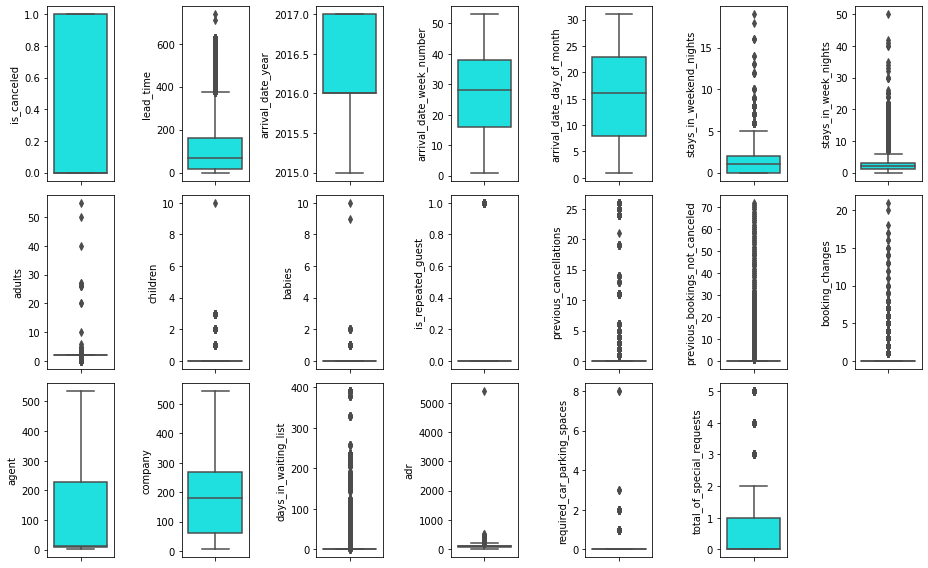

In [16]:
# adjust the figure size for better readability
plt.figure(figsize=(13,8))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(3, len(features)//3 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='cyan')
    plt.tight_layout()

#### Distribution Form

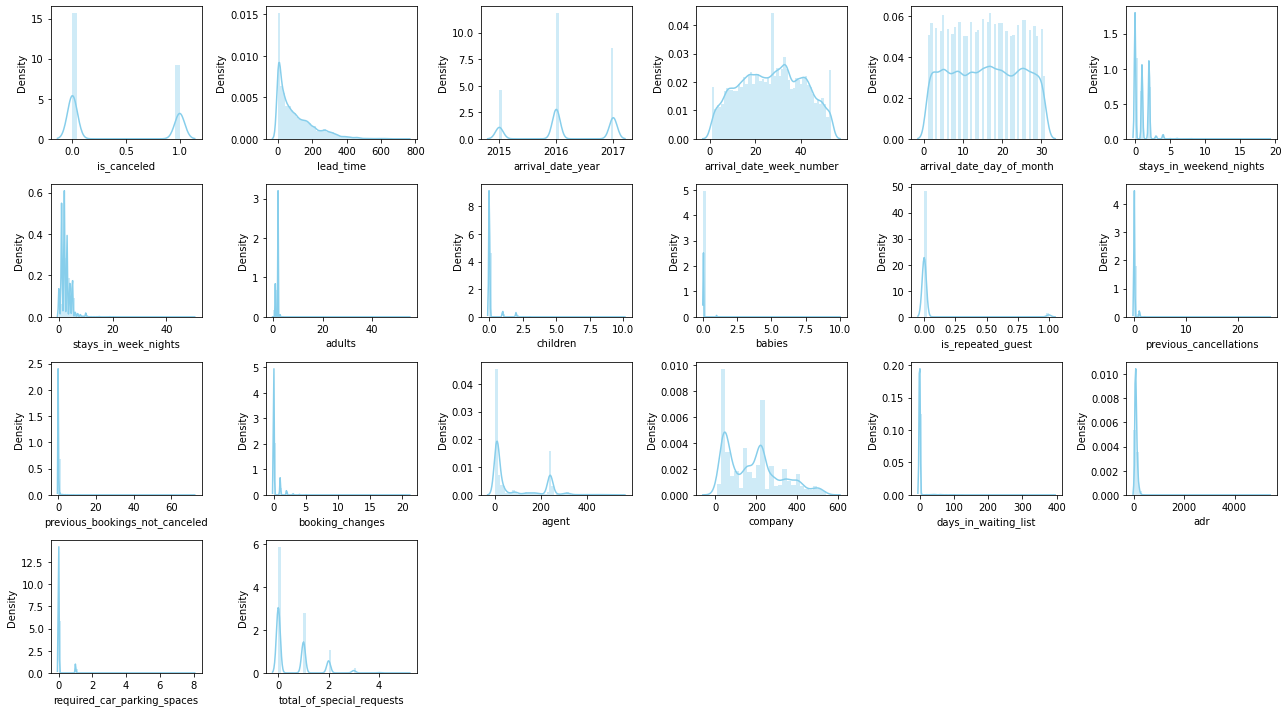

In [17]:
# adjust the figure size for better readability
plt.figure(figsize=(18,10))

features = numericals
for i in range(0, len(features)):
    plt.subplot(4, len(features)//4 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

### Multivariate Analysis

#### Correlation Heatmap

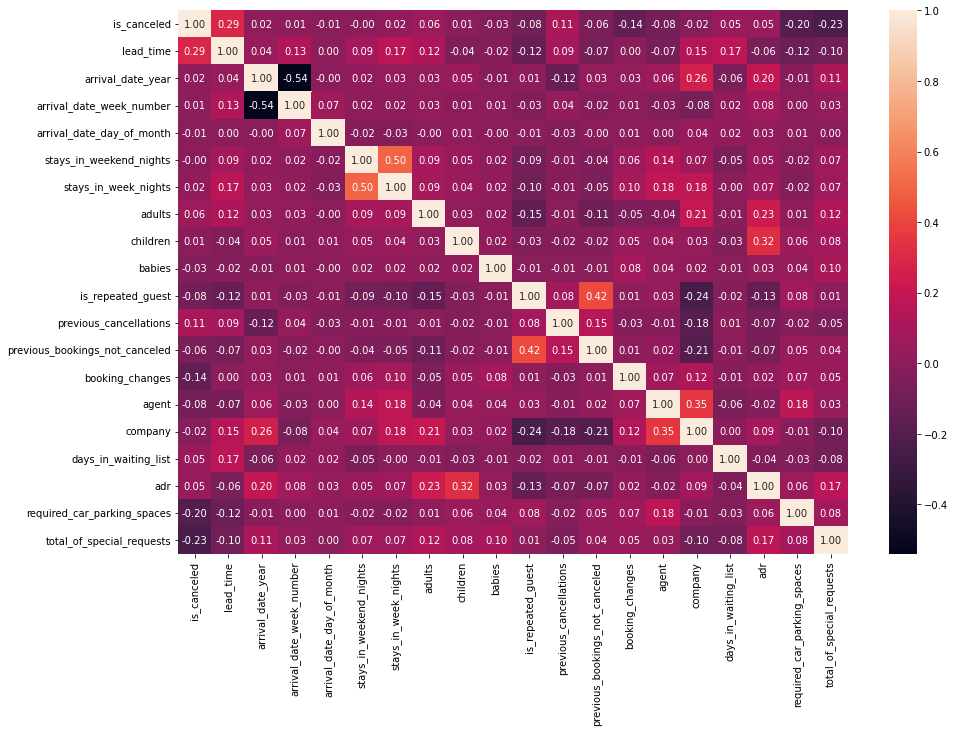

In [18]:
# heatmap correlation
# data_train = pd.concat([X_train, y_train], axis=1)
corr = df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

### Deep-Dive Exploration

#### Reservation Status

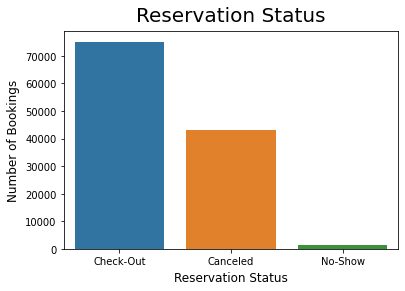

In [19]:
# Visualizing bookings canceled prior to arrival: 
reserve_status = df['reservation_status'].value_counts().reset_index()

plt.title("Reservation Status", fontsize = 20, pad = 10)
sns.barplot(x=reserve_status['index'],y=reserve_status['reservation_status'])
plt.xlabel("Reservation Status", fontsize = 12, labelpad = 5)
plt.ylabel("Number of Bookings", fontsize = 12, labelpad = 5);
plt.show()

**Interpretation**: Majority of bookings are canceled prior to arrival.

#### Correlation between features and cancellation

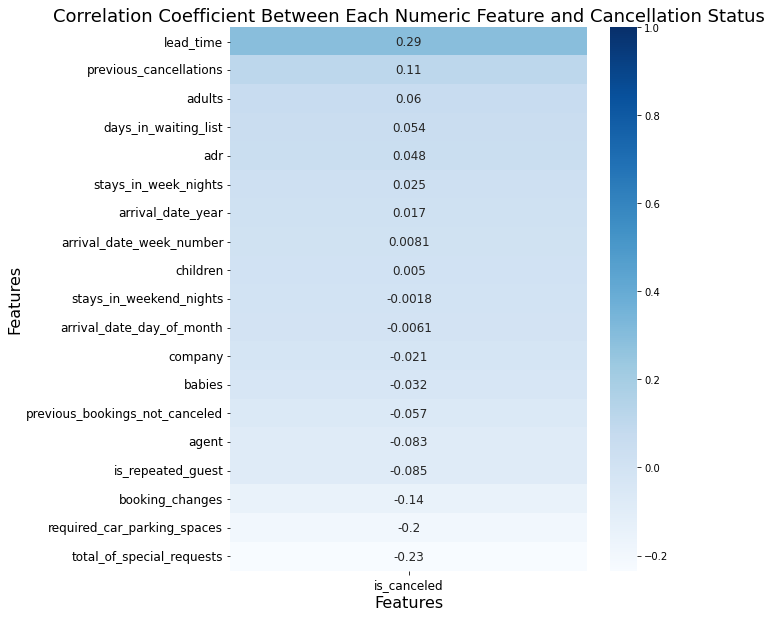

In [20]:
# Visualizing correlation coefficients between features and cancellation:
fig = plt.figure(figsize=(8,10))
ax = sns.heatmap(df.corr()[['is_canceled']].sort_values('is_canceled', ascending=False), annot = True, annot_kws = {"size":12}, cmap='Blues')
ax.set_title('Correlation Coefficient Between Each Numeric Feature and Cancellation Status', fontsize=18)
ax.set_xlabel('Features', fontsize = 16)
ax.set_ylabel('Features', fontsize = 16)
ax.tick_params(axis = "both", labelsize = 12);
y_min, y_max = ax.get_ylim()
ax.set_ylim(top=y_max+1);

**Interpretation:** 
- `lead_time` is the most highly correlated feature with whether or not a booking is canceled. It makes sense that as the number of days between when the booking is made and the supposed arrival date increases, customers have more time to cancel the reservation and there is more time for an unforeseen circumstance derailing travel plans to arise. 
- Interestingly, the `total_of_special_requests` is the second feature with the strongest correlation to our `is_canceled` target. As the number of special requests made increases, the likelihood that a booking is canceled decreases. This suggests that engagement with the hotel prior to arrival and feeling like their needs are heard may make a customer less likely to cancel their reservation.
- Related to special requests, the number of `required car parking spaces` is the third feature with the strongest correlation to our `is_canceled` target. As the number of parking spaces requests increases, the likelihood that a booking is canceled decreases. Potential reasons for this relationship are discussed later on. 
- Interestingly, a customer's prior history with the hotel (measured by the number of `previous bookings not canceled`  or whether or not a customer `is a repeated guest`) does not seem to be highly correlated with whether or not the current booking will be canceled. On the other hand, a customer's prior history of cancellation (measured by the number of `previous cancellations` is more highly correlated with whether or not the current booking will be canceled. 

#### Lead time for canceled and not canceled bookings

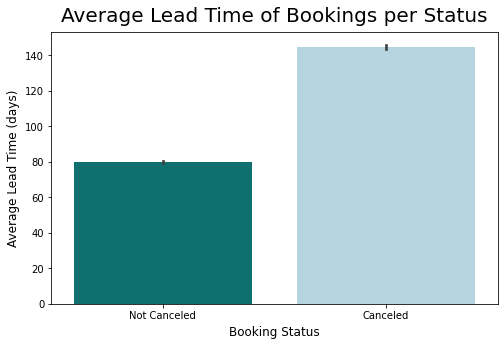

In [21]:
# Visualizing the average lead time for canceled and not canceled bookings:
plt.figure(figsize=(8,5)) 
plt.title("Average Lead Time of Bookings per Status", fontsize = 20, pad = 10)
sns.barplot(x=df['is_canceled'], y=df['lead_time'], palette=['teal', 'lightblue'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Lead Time (days)", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

**Interpretation**: Canceled bookings have a longer lead time on average. Potential reasons why were discussed above.

#### Special requests for canceled and not canceled bookings

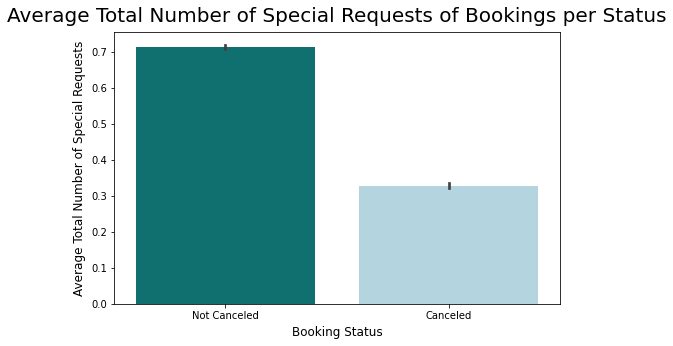

In [22]:
# Visualizing the total number of special requests for canceled and not canceled bookings:
plt.figure(figsize=(8,5)) 
plt.title("Average Total Number of Special Requests of Bookings per Status", fontsize = 20, pad = 10)
sns.barplot(x=df['is_canceled'], y=df['total_of_special_requests'], palette=['teal', 'lightblue'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Total Number of Special Requests", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

**Interpretation:** Customers who cancel their bookings make on average fewer special requests. Potential reasons why were discussed above. 

#### Requested parking spaces for canceled and not canceled bookings

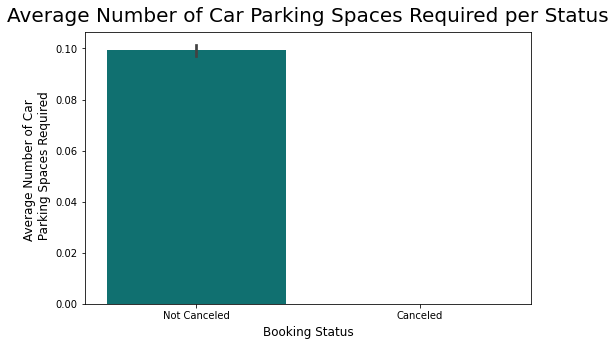

In [23]:
# Visualizing the total number of requested parking spaces for canceled and not canceled bookings:
plt.figure(figsize=(8,5)) 
plt.title("Average Number of Car Parking Spaces Required per Status", fontsize = 20, pad = 10)
sns.barplot(x=df['is_canceled'], y=df['required_car_parking_spaces'], palette=['teal', 'lightblue'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Number of Car \n Parking Spaces Required", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

**Interpretation:** 

On average, customers who do not cancel their bookings tend to require more parking spaces. Similarly to the number of special requests, it would make sense that the more a customer engages with the hotel (by putting in a  request for a parking spot), the less likely they are to cancel. It is also fair to think that by the time a guest is thinking about where they will park their car, they are most likely pretty commited to their destination. Finally, thinking about this from the hotel perpective, it is possible that not many hotels around have a parking. As a result, the need for a parking space would limit the customer in their hotel options and make them less likely to cancel. More information would be required from the hotel directly to confirm this theory. However, if true, this suggests that adding parking spaces could be a way to help reduce cancellations. 

#### Number of bookings canceled for each room type

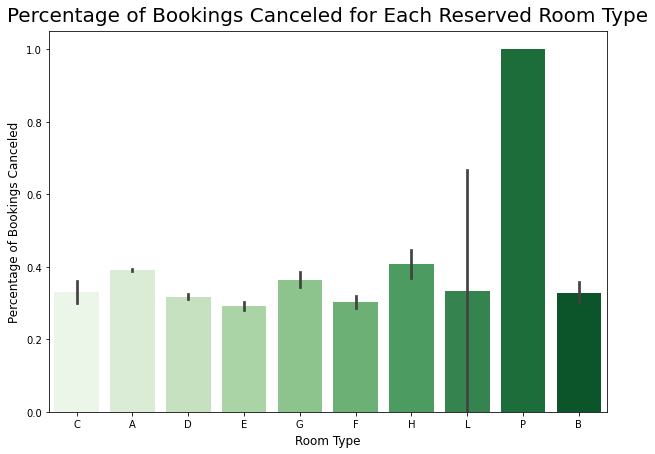

In [24]:
# Visualizing number of bookings canceled for each room type:
plt.figure(figsize=(10,7)) 
plt.title("Percentage of Bookings Canceled for Each Reserved Room Type", fontsize = 20, pad = 10)
sns.barplot(x=df['reserved_room_type'], y=df['is_canceled'], palette='Greens')
plt.xlabel("Room Type", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings Canceled", fontsize = 12, labelpad = 5);

**Interpretation:** 

Customers who reserved room type P have the highest percentage booking cancellation with 100% of bookings canceled. As the dataset did not provide the actual room designations for anonymity purposes, it is hard to interpret why bookings of room type P are canceled more often. 

#### Arrival Month

In [25]:
df['arrival_date_month'].value_counts().reset_index()

,index,arrival_date_month
0,August,13877
1,July,12661
2,May,11791
3,October,11160
4,April,11089
5,June,10939
6,September,10508
7,March,9794
8,February,8068
9,November,6794


The month column is not in order because the data type is char, so it is sorted alphabetically. Firstly, we have to provide right hierarchy to month column.

In [26]:
!pip install sort-dataframeby-monthorweek

!pip install sorted-months-weekdays

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3442 sha256=41a1a6a6956ec30d4403d17ed9fc7016c78f8e0664ed84dcc7e4d9ea04d1144b
  Stored in directory: /root/.cache/pip/wheels/de/e1/ad/5fe265a9780676079c4b8caaaffaa8d5c4ab2f37cf823e8aa8
Successfully built sort-dataframeby-monthorweek
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3247 sha256=7ac82c6ca7c3cbeaf945fc5e4b30e2b85482a953ffb5e1feb63d4d5484e6562e
  Stored in directory: /root/.cache/pip/wheels/4f/4f/78/3f1b8fc72651f7c766a6f73d667fccb12a8aabe240b38df7a4
Successfully built sorted-months-weekdays


In [27]:
import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [28]:
arrival_month = df['arrival_date_month'].value_counts().reset_index()
sort_arrival_month = sort_month(arrival_month, 'index')

sort_arrival_month

,index,arrival_date_month
0,January,5929
1,February,8068
2,March,9794
3,April,11089
4,May,11791
5,June,10939
6,July,12661
7,August,13877
8,September,10508
9,October,11160


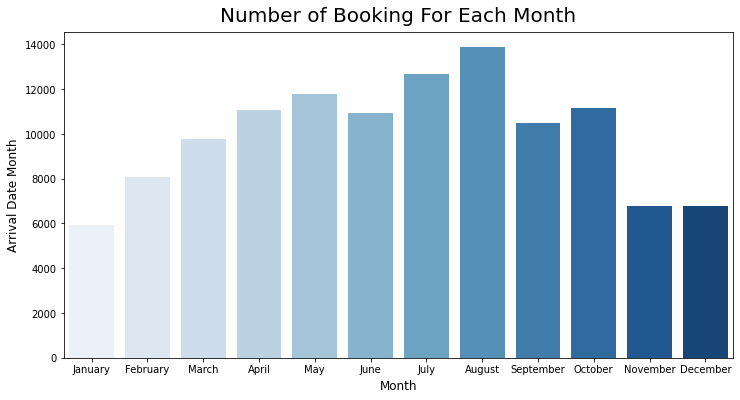

In [29]:
plt.figure(figsize=(12,6)) 
plt.title("Number of Booking For Each Month", fontsize = 20, pad = 10)
sns.barplot(x=sort_arrival_month['index'],y=sort_arrival_month['arrival_date_month'], palette='Blues')
plt.xlabel("Month", fontsize = 12, labelpad = 5)
plt.ylabel("Arrival Date Month", fontsize = 12, labelpad = 5);
plt.show()

**Interpretation:** 

Based on number of bookings, we can divide the year into three seasons:
* Peak season : June - August
* Shoulder season : March - May and September-October
* Off-season : November - February

Season In Europe

|Months|Min Temperature|Season|
|-----------|----|----|
|DEC - FEB	| 14°c| Summer |
|SEP - NOV	| 7°c	| Autumn|
|MAR - MAY	| 7°c	| Winters|
|JUN - AUG	| 2°c	| Spring|

# 4. Data Preprocessing

## 4.1 Missing Values

In [30]:
# missing values in percentage
data_missing_value = df.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,company,112593,94.31
1,agent,16340,13.69
2,country,488,0.41


The missing data in `company` is 94.31% which is very high. Since information about the type of agent and company used is included in the `market_segment` and `distribution_channel` features, the `agent` and `company` features were not included in the model. 

In [51]:
# copy df for data preprocessing
df_hotel = df.copy()

In [52]:
df_hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [53]:
df_hotel.drop(columns=['company', 'agent'], inplace=True)
df_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


Because the missing data in `country` is small in portion 0.41%, we can simply drop them.

In [54]:
# drop na values
df_hotel = df_hotel.dropna()

In [55]:
# sanity check
df_hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In EDA we found that Min value in `adults` column is 0. It is weird because a reservation should be made by at least one adults. So we will take only data that have minimal 1 adult.

In [56]:
df_hotel = df_hotel[df_hotel['adults'] != 0]

## 4.2 Duplicated Values

In [57]:
# number of duplicated data
df_hotel.duplicated().sum()

31971

In [58]:
# percentage of duplicated data
df_hotel.duplicated().sum() * 100 / len(df_hotel)

26.97860849753175

In [59]:
# Checking for duplicates: 
df_hotel[df_hotel.duplicated(keep='first')]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


The dataset contains 31971 duplicates (27% of data). However, it is possible that multiple bookings with the same features were made on the same day. Since we do not have a feature such as "booking ID", we cannot say for sure that those are true duplicates which makes deleting those "duplicates" questionable. So we will keep the "duplicates"

## 4.3 Data Encoding

In [60]:
correlation = df.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
agent                             0.083114
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
company                           0.020642
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005048
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

We do not want to leak any information about our target (cancellation) into our model. As a result, we must remove `reservation_status`, and `country` from our features.   

Finally, as models cannot take in datetime objects as features, the `reservation_status_date` and `arrival_date_year` features were also excluded from the clustering model.

In [61]:
# dropping columns that are not useful

useless_col = ['arrival_date_year',  'reservation_status', 'country',                
               'assigned_room_type','reservation_status_date']

df_hotel.drop(useless_col, axis = 1, inplace = True)

In [62]:
df_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,3,No Deposit,0,Transient,0.0,0,0
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,4,No Deposit,0,Transient,0.0,0,0
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,0,BB,Direct,Direct,0,0,0,A,0,No Deposit,0,Transient,75.0,0,0
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,0,BB,Corporate,Corporate,0,0,0,A,0,No Deposit,0,Transient,75.0,0,0
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,0,No Deposit,0,Transient,98.0,0,1


In [63]:
# Group categoric columns
categoricals = df_hotel.loc[:, (df.dtypes != int) & (df.dtypes != float)].columns.tolist()
categoricals

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type']

In [64]:
cat_df = df_hotel[categoricals]
cat_df.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient


In [65]:
# Encoding categorical features
cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

cat_df['arrival_date_month'] = cat_df['arrival_date_month'].map({'January' : 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5,
                                                                 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 
                                                                 'November': 11, 'December': 12})

cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

cat_df['market_segment'] = cat_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

cat_df['reserved_room_type'] = cat_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 2})

cat_df['customer_type'] = cat_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

In [66]:
cat_df.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type
0,0,7,0,0,0,0,0,0
1,0,7,0,0,0,0,0,0
2,0,7,0,0,0,1,0,0
3,0,7,0,1,1,1,0,0
4,0,7,0,2,2,1,0,0


In [68]:
cat_col = ['hotel', 
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type']

df_hotel.drop(cat_col, axis = 1, inplace = True)

In [69]:
# before concat
df_hotel.head()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,27,1,0,0,2,0.0,0,0,0,0,3,0,0.0,0,0
1,0,737,27,1,0,0,2,0.0,0,0,0,0,4,0,0.0,0,0
2,0,7,27,1,0,1,1,0.0,0,0,0,0,0,0,75.0,0,0
3,0,13,27,1,0,1,1,0.0,0,0,0,0,0,0,75.0,0,0
4,0,14,27,1,0,2,2,0.0,0,0,0,0,0,0,98.0,0,1


In [70]:
df_hotel = pd.concat([df_hotel, cat_df], axis = 1 )

In [72]:
# after concat
df_hotel.head()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type
0,0,342,27,1,0,0,2,0.0,0,0,0,0,3,0,0.0,0,0,0,7,0,0,0,0,0,0
1,0,737,27,1,0,0,2,0.0,0,0,0,0,4,0,0.0,0,0,0,7,0,0,0,0,0,0
2,0,7,27,1,0,1,1,0.0,0,0,0,0,0,0,75.0,0,0,0,7,0,0,0,1,0,0
3,0,13,27,1,0,1,1,0.0,0,0,0,0,0,0,75.0,0,0,0,7,0,1,1,1,0,0
4,0,14,27,1,0,2,2,0.0,0,0,0,0,0,0,98.0,0,1,0,7,0,2,2,1,0,0


# 5. Modelling

## Split Data

In [73]:
# Split train and test data
from sklearn.model_selection import train_test_split

X = df_hotel.drop(columns='is_canceled')
y = df_hotel[['is_canceled']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Choosing Appropriate Metric

Since Cancelled booking is a classification case, I will use **Logistic Regression**, **KNN**, **Decision Tree**, and **Random Forest** to model the data. Data in target column `is_canceled` is balance (60:40), so I will use **accuracy** as the scoring parameter.

## Logistic Regression

In [78]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"AUC Score of Logistic Regression is : {auc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.777266781992321
AUC Score of Logistic Regression is : 0.734079583193324
Confusion Matrix : 
[[13433  1381]
 [ 3898  4989]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.78      0.91      0.84     14814
           1       0.78      0.56      0.65      8887

    accuracy                           0.78     23701
   macro avg       0.78      0.73      0.74     23701
weighted avg       0.78      0.78      0.77     23701



## KNN

In [79]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"AUC Score of KNN is : {auc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.7710223197333446
AUC Score of KNN is : 0.7431756306234516
Confusion Matrix : 
[[12659  2155]
 [ 3272  5615]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.85      0.82     14814
           1       0.72      0.63      0.67      8887

    accuracy                           0.77     23701
   macro avg       0.76      0.74      0.75     23701
weighted avg       0.77      0.77      0.77     23701



## Decision Tree Classifier

In [80]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
auc_dtc = roc_auc_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"AUC Score of Decision Tree is : {auc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.8202607484916248
AUC Score of Decision Tree is : 0.8099363277515426
Confusion Matrix : 
[[12610  2204]
 [ 2056  6831]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.85      0.86     14814
           1       0.76      0.77      0.76      8887

    accuracy                           0.82     23701
   macro avg       0.81      0.81      0.81     23701
weighted avg       0.82      0.82      0.82     23701



## Random Forest Classifier

In [81]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
auc_rd_clf = roc_auc_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"AUC Score of Random Forest is : {auc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.8648580228682334
AUC Score of Random Forest is : 0.8434735804809312
Confusion Matrix : 
[[13762  1052]
 [ 2151  6736]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.93      0.90     14814
           1       0.86      0.76      0.81      8887

    accuracy                           0.86     23701
   macro avg       0.86      0.84      0.85     23701
weighted avg       0.86      0.86      0.86     23701



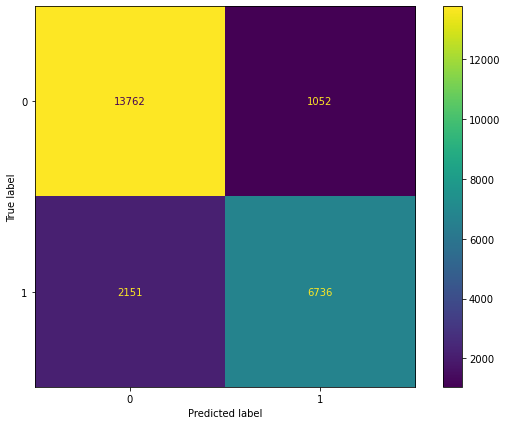

In [82]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rd_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rd_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rd_clf.classes_)
disp.plot(ax=ax)
plt.show()

### Model Evaluation Comparison

In [84]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Accuracy Score' : [acc_lr, acc_knn, acc_dtc, acc_rd_clf],
    'ROC AUC Score' : [auc_lr, auc_knn, auc_dtc, auc_rd_clf],
})


models.sort_values(by = 'Accuracy Score', ascending = False)

,Model,Accuracy Score,ROC AUC Score
3,Random Forest Classifier,0.864858,0.843474
2,Decision Tree Classifier,0.820261,0.809936
0,Logistic Regression,0.777267,0.734080
1,KNN,0.771022,0.743176


# Modelling with Hyperparameter Tuning

## Split Data

In [85]:
# Split train and test data
from sklearn.model_selection import train_test_split

X = df_hotel.drop(columns='is_canceled').to_numpy()
y = df_hotel[['is_canceled']].to_numpy()
y = y.reshape(len(y),)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Logistic Regression

In [86]:
# define the estimator/model
lr = LogisticRegression()

In [89]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'penalty': ('none','l1', 'l2'),
    'C': (100, 10, 1.0, 0.1, 0.01),
}

# note: we use accuracy
lr_gridcv = GridSearchCV(lr, parameters, cv=5, scoring='accuracy')
lr_gridcv.fit(X_train, y_train)

CPU times: user 1min 34s, sys: 57.9 s, total: 2min 32s
Wall time: 1min 17s


In [90]:
# the compact results
cv_result = pd.DataFrame(lr_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
8,"{'C': 1.0, 'penalty': 'l2'}",0.777963,1
0,"{'C': 100, 'penalty': 'none'}",0.776655,2
3,"{'C': 10, 'penalty': 'none'}",0.776655,2
6,"{'C': 1.0, 'penalty': 'none'}",0.776655,2
9,"{'C': 0.1, 'penalty': 'none'}",0.776655,2
12,"{'C': 0.01, 'penalty': 'none'}",0.776655,2
14,"{'C': 0.01, 'penalty': 'l2'}",0.776623,7
2,"{'C': 100, 'penalty': 'l2'}",0.776191,8
5,"{'C': 10, 'penalty': 'l2'}",0.775874,9
11,"{'C': 0.1, 'penalty': 'l2'}",0.773934,10


**Result in hyperparameter tuning**

'C': 1.0, 'penalty': 'l2'

In [91]:
y_pred_lr = lr_gridcv.best_estimator_.predict(X_test)

acc_lr_tune = accuracy_score(y_test, y_pred_lr)
auc_lr_tune = roc_auc_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr_tune}")
print(f"AUC Score of Logistic Regression is : {auc_lr_tune}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.777266781992321
AUC Score of Logistic Regression is : 0.734079583193324
Confusion Matrix : 
[[13433  1381]
 [ 3898  4989]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.78      0.91      0.84     14814
           1       0.78      0.56      0.65      8887

    accuracy                           0.78     23701
   macro avg       0.78      0.73      0.74     23701
weighted avg       0.78      0.78      0.77     23701



## KNN

In [97]:
# define the estimator/model
knn_clf = KNeighborsClassifier()

In [98]:
# hyperparameter tuning
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4)
}

knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='accuracy')
knn_clf_gridcv.fit(X_train, y_train)

CPU times: user 6min 45s, sys: 24.3 s, total: 7min 10s
Wall time: 6min 8s


In [99]:
# the compact results
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 2},0.787477,1
2,{'n_neighbors': 4},0.778068,2
1,{'n_neighbors': 3},0.766276,3


**Result in hyperparameter tuning**

'n_neighbors: 2

In [100]:
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)

acc_knn_tune = accuracy_score(y_test, y_pred_knn)
auc_knn_tune = roc_auc_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn_tune}")
print(f"AUC Score of KNN is : {auc_knn_tune}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.7710223197333446
AUC Score of KNN is : 0.7431756306234516
Confusion Matrix : 
[[12659  2155]
 [ 3272  5615]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.85      0.82     14814
           1       0.72      0.63      0.67      8887

    accuracy                           0.77     23701
   macro avg       0.76      0.74      0.75     23701
weighted avg       0.77      0.77      0.77     23701



## Decision Tree Classifier

In [101]:
# define the estimator/model
dtc = DecisionTreeClassifier()

In [102]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth':(1,2,3,4,5)
}

# note: we use accuracy
dtc_gridcv = GridSearchCV(dtc, parameters, cv=5, scoring='accuracy')
dtc_gridcv.fit(X_train, y_train)

CPU times: user 4.53 s, sys: 42.5 ms, total: 4.57 s
Wall time: 4.59 s


In [103]:
# the results
cv_result = pd.DataFrame(dtc_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
4,{'max_depth': 5},0.781940,1
3,{'max_depth': 4},0.767373,2
2,{'max_depth': 3},0.766508,3
1,{'max_depth': 2},0.750127,4
0,{'max_depth': 1},0.750105,5


**Result in hyperparameter tuning**

max_depth: 5

In [104]:
y_pred_dtc = dtc_gridcv.best_estimator_.predict(X_test)

acc_dtc_tune = accuracy_score(y_test, y_pred_dtc)
auc_dtc_tune = roc_auc_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc_tune}")
print(f"AUC Score of Decision Tree is : {auc_dtc_tune}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.7804733977469305
AUC Score of Decision Tree is : 0.7519065716106228
Confusion Matrix : 
[[12831  1983]
 [ 3220  5667]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.87      0.83     14814
           1       0.74      0.64      0.69      8887

    accuracy                           0.78     23701
   macro avg       0.77      0.75      0.76     23701
weighted avg       0.78      0.78      0.78     23701



## Random Forest Classifier

In [105]:
# define the estimator/model
rf_clf = RandomForestClassifier()

In [106]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

# note: we use accuracy
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='accuracy')
rf_clf_gridcv.fit(X_train, y_train)

CPU times: user 1min 56s, sys: 2.59 s, total: 1min 59s
Wall time: 2min


In [107]:
# the results
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
20,"{'max_depth': 5, 'n_estimators': 10}",0.769493,1
24,"{'max_depth': 5, 'n_estimators': 50}",0.768153,2
23,"{'max_depth': 5, 'n_estimators': 40}",0.768037,3
22,"{'max_depth': 5, 'n_estimators': 30}",0.767932,4
21,"{'max_depth': 5, 'n_estimators': 20}",0.767489,5
19,"{'max_depth': 4, 'n_estimators': 50}",0.767162,6
12,"{'max_depth': 3, 'n_estimators': 30}",0.766940,7
17,"{'max_depth': 4, 'n_estimators': 30}",0.766919,8
18,"{'max_depth': 4, 'n_estimators': 40}",0.766887,9
16,"{'max_depth': 4, 'n_estimators': 20}",0.766687,10


**Result in hyperparameter tuning**

max_depth: 5, n_estimators: 10

In [108]:
y_pred_rf_clf = rf_clf_gridcv.best_estimator_.predict(X_test)

acc_rf_clf_tune = accuracy_score(y_test, y_pred_rf_clf)
auc_rf_clf_tune = roc_auc_score(y_test, y_pred_rf_clf)
conf = confusion_matrix(y_test, y_pred_rf_clf)
clf_report = classification_report(y_test, y_pred_rf_clf)

print(f"Accuracy Score of Random Forest is : {acc_rf_clf_tune}")
print(f"AUC Score of Random Forest is : {auc_rf_clf_tune}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.7689970887304333
AUC Score of Random Forest is : 0.6930462774980024
Confusion Matrix : 
[[14766    48]
 [ 5427  3460]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.73      1.00      0.84     14814
           1       0.99      0.39      0.56      8887

    accuracy                           0.77     23701
   macro avg       0.86      0.69      0.70     23701
weighted avg       0.83      0.77      0.74     23701



### Model Evaluation Comparison

In [116]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Accuracy Score Before Tuning' : [acc_lr, acc_knn, acc_dtc, acc_rd_clf],
    'ROC AUC Score Before Tuning' : [auc_lr, auc_knn, auc_dtc, auc_rd_clf],
    'Accuracy Score After Tuning' : [acc_lr_tune, acc_knn_tune, acc_dtc_tune, acc_rf_clf_tune],
    'ROC AUC Score After Tuning' : [auc_lr_tune, auc_knn_tune, auc_dtc_tune, auc_rf_clf_tune]
})


models.sort_values(by = 'Model', ascending = False)

,Model,Accuracy Score Before Tuning,ROC AUC Score Before Tuning,Accuracy Score After Tuning,ROC AUC Score After Tuning
3,Random Forest Classifier,0.864858,0.843474,0.768997,0.693046
0,Logistic Regression,0.777267,0.734080,0.777267,0.734080
1,KNN,0.771022,0.743176,0.771022,0.743176
2,Decision Tree Classifier,0.820261,0.809936,0.780473,0.751907


# Conclusion

* The best model to predict hotel booking cancellation is Random Forest Classifier without hyperparameter tuning. This model classifies whether or not a booking will be canceled with 86% accuracy. As a result, this model would allow hotels to more accurately forecast their occupancy, manage their business accordingly, and increase their revenue.

* There are 3 features that highly correlated with booking cancellation, that is `lead_time`, `total_of_special_requests`, and `required_car_parking_spaces`.

* As the number of special requests made increases, the likelihood that a booking is canceled decreases. This suggests that engagement with the hotel prior to arrival and feeling like their needs are heard may make a customer less likely to cancel their reservation.

* On average, customers who do not cancel their bookings tend to require more parking spaces. Similarly to the number of special requests, it would make sense that the more a customer engages with the hotel (by putting in a request for a parking spot), the less likely they are to cancel. It is also fair to think that by the time a guest is thinking about where they will park their car, they are most likely pretty commited to their destination. Finally, thinking about this from the hotel perpective, it is possible that not many hotels around have a parking. As a result, the need for a parking space would limit the customer in their hotel options and make them less likely to cancel. More information would be required from the hotel directly to confirm this theory. However, if true, this suggests that adding parking spaces could be a way to help reduce cancellations.

* Spring time is the peak season for hotel where occupancy level is high.

# References

* https://www.kaggle.com/code/niteshyadav3103/hotel-booking-prediction-99-5-acc/notebook
* https://www.kaggle.com/code/marcuswingen/eda-of-bookings-and-ml-to-predict-cancelations
* https://www.kaggle.com/code/akashkumar01/hotel-booking-demand-modelling-and-strategy
* https://www.kaggle.com/code/firdaussalim/hotel-booking-demand-eda
* https://www.researchgate.net/publication/310504011_Predicting_Hotel_Booking_Cancellation_to_Decrease_Uncertainty_and_Increase_Revenue
* https://github.com/JulKelman/Predicting-Hotel-Bookings-Cancellation
* https://www.analyticsvidhya.com/blog/2022/03/end-to-end-hotel-booking-cancellation-machine-learning-model/



